<div style="width: 100%; clear: both;">
<img src="https://www.publicdomainpictures.net/pictures/100000/velka/tree-1409159715eln.jpg", align="left", width="175", height="175">   
<div style="float: left; width: 100%; font-family: Luminari, fantasy;">
<p style="margin: ; padding-top: 10px; text-align:left;  font-size: 19px; ">Porfolio of Ruben Deulofeu Gomez</p>
    <p style="margin: 0; text-align:left; font-size: 16px;">Data science & Machine Learning </p>
    <p style="margin: 0; text-align:left; padding-bottom: 10px; font-size: 16px;">2021</p>
</div>
</div>

# Machine Learning Supervised Algorithms Analysis

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.utils import check_random_state

from IPython.display import Image
import pydotplus
from six import StringIO

import umap

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

## 1. MNIST Dataset

We will use the  MNIST Digit Dataset for analyzing some supervised algorithms. The idea is that given an image of a handwritten digit, the model should classify it correctly. 

In [2]:
# Upload dataset
X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation].astype(int)
X = X.reshape((X.shape[0], -1))

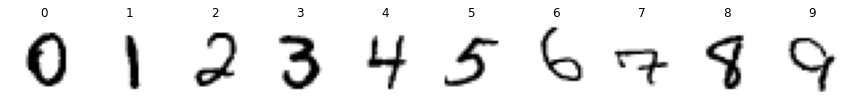

In [3]:
# Plotting some examples of data 
fig, axis = plt.subplots(1, 10, figsize=(12, 6))
for i, ax in zip(range(10), axis):
    ax.imshow(X[y == i][0].reshape(28, 28), cmap='gray_r')
    ax.set_title(str(i))
    ax.axis('off')
plt.tight_layout()

The dataset is quite large. Since we just want to analyze some algorithms, we will reduce the samples to save some computation time, without changing significantly the results. 

In [4]:
all_data = pd.DataFrame(X)
all_data['y'] = y

sample_data = all_data.sample(frac = 0.1, random_state=24)
X = sample_data.drop(columns=['y'])
y = sample_data['y']

print(all_data.shape)
print(sample_data.shape)

(70000, 785)
(7000, 785)


In [5]:
# Train set and Test set definition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In order to represent the data in a 2-dimension space, we will use the UMAP technique, which is used for dimension reduction.  

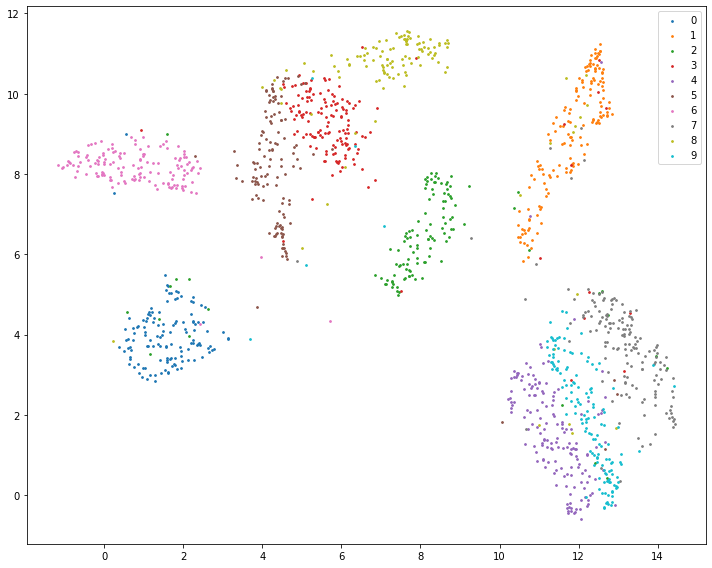

In [6]:
model = umap.UMAP(n_components=2, random_state=42)
model.fit(X_train)
X_train_projection = model.transform(X_train)
X_test_projection = model.transform(X_test)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for i in range(10):
    ax.scatter(X_test_projection[y_test == i,0], X_test_projection[y_test == i,1], s=3, label=str(i))
plt.legend()
plt.tight_layout()

We will plot the decision boundaries associated to each model. These boundaries determine which label will the algorithm select between 10 possible options (0 to 9 digit) for every sample of data. 

In [7]:
# Mesh grid definition
x_min, x_max = X_test_projection[:, 0].min() - 1, X_test_projection[:, 0].max() + 1
y_min, y_max = X_test_projection[:, 1].min() - 1, X_test_projection[:, 1].max() + 1
    
# Decision boundary definition and plotting
def plot_decision_boundaries(model, X_test_projection, y_test):
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Colour set
    cmap_light = ListedColormap(['gainsboro','lightgreen','peachpuff','lightcyan', 'pink',
                                 'lightyellow','lavender','lightcoral', 'lightskyblue', 'aquamarine'])
    cmap_bold = ['grey','g','sandybrown','c','palevioletred', 
                 'y','mediumpurple','firebrick', 'dodgerblue', 'mediumaquamarine']
    
    # Boundary plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(20,10))
    plt.pcolormesh(xx, yy, Z, shading = "auto", cmap=cmap_light)

    # Points plot
    for i in range(10):
        plt.scatter(X_test_projection[y_test == i,0], X_test_projection[y_test == i,1], 
                    s=3, label=str(i), c=cmap_bold[i])
    plt.legend()
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())    

### 1.1. Gaussian Naïve Bayes

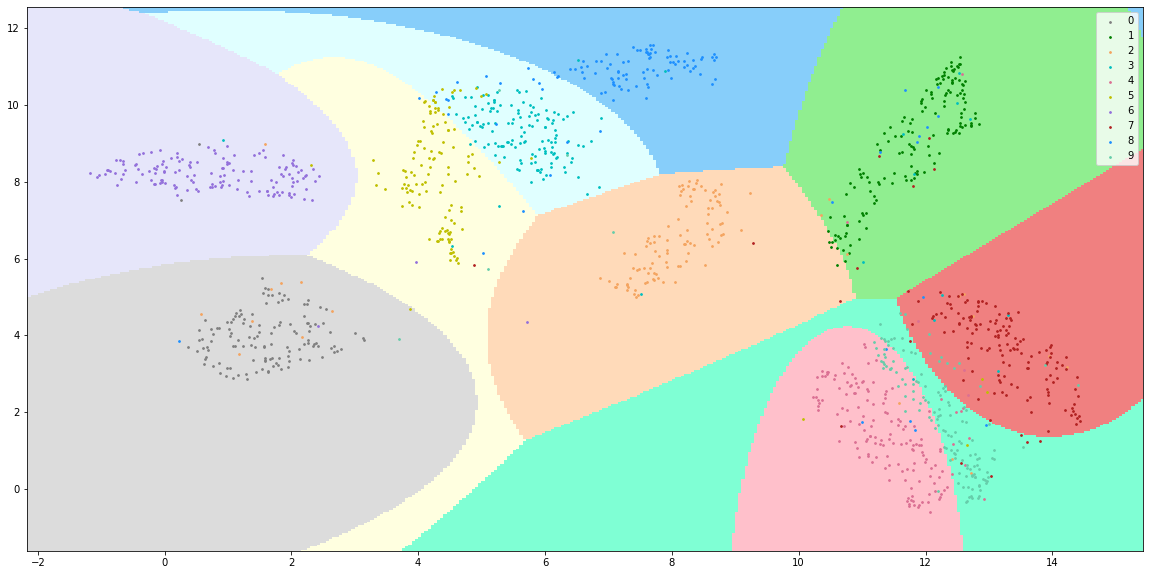

In [9]:
model = GaussianNB()
model.fit(X_train_projection, y_train)
plot_decision_boundaries(model, X_test_projection, y_test)

In [11]:
x_train_predict = model.predict(X_train_projection)
x_test_predict = model.predict(X_test_projection)

print("Training Accuracy = ", round(accuracy_score(y_train, x_train_predict), 3))
print("Test Accuracy = ", round(accuracy_score(y_test, x_test_predict), 3))

print("Confusion matrix:\n", confusion_matrix(y_test, x_test_predict))

Training Accuracy =  0.874
Test Accuracy =  0.861
Confusion matrix:
 [[127   0   0   0   0   0   2   0   0   0]
 [  0 142   6   0   0   0   0   0   0   0]
 [  8   3 101   0   1   0   1   5   0   2]
 [  0   6   1 136   1   3   1   4   2   0]
 [  0   2   0   0 142   0   0   3   0   9]
 [  1   0   0  16   1 106   1   2   0   1]
 [  1   0   1   0   0   1 142   0   0   0]
 [  0   5   2   0   1   1   0 137   0   6]
 [  1   8   0  17   4   3   0   1  85   1]
 [  1   0   1   2  43   1   0  11   0  88]]


### 1.2. KNN (K-Nearest-Neighbor)

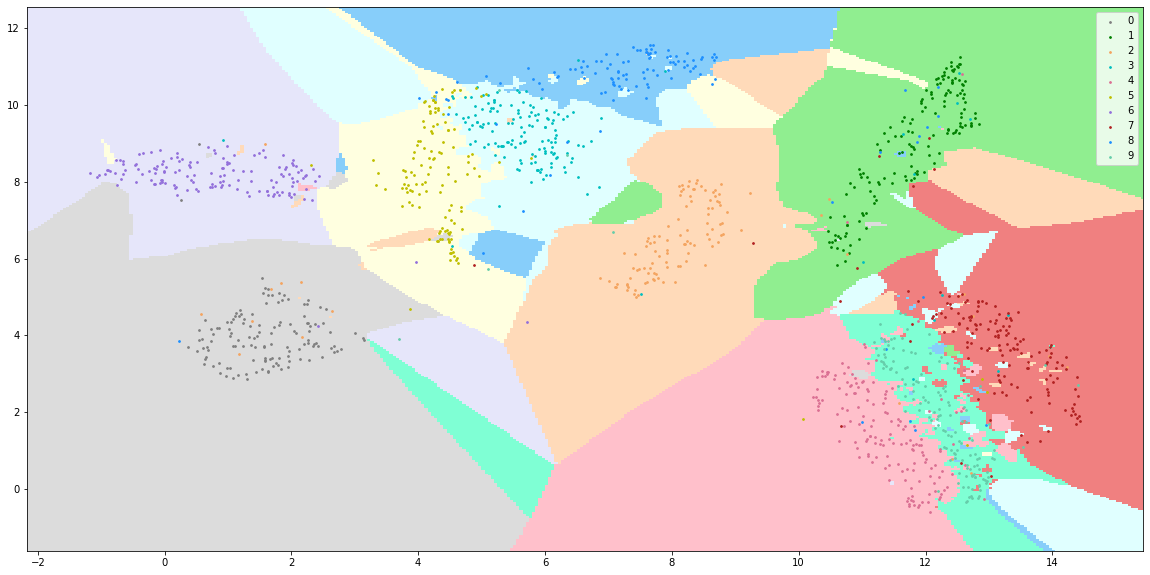

In [10]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train_projection, y_train)
plot_decision_boundaries(model, X_test_projection, y_test)

We have selected randomly the *n*_neighbors of the above model. Now, let's find out which *n* is optimal (most precision in test test). We will use GridSearchCV funciton for that. 

 k(n_neighbors)     Mean  Standard Deviaiton
              1 0.898214            0.009633
              2 0.902143            0.003977
              3 0.925714            0.005742
              4 0.925179            0.007771
              5 0.928393            0.008191
              6 0.929107            0.007998
              7 0.930179            0.008210
              8 0.931071            0.009007
              9 0.930893            0.009425
             10 0.931250            0.009415
Best performance when k = 10


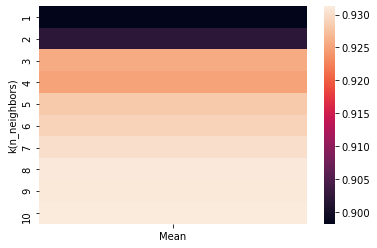

In [15]:
parameters = {'n_neighbors': range(1,11)}
grid = GridSearchCV(KNeighborsClassifier(), parameters)
grid.fit(X_train_projection, y_train)
result = pd.DataFrame({"k(n_neighbors)": list(range(1,11)) , "Mean": grid.cv_results_["mean_test_score"], 
                       "Standard Deviaiton": grid.cv_results_["std_test_score"]})

print(result.to_string(index=False))

print("Best performance when k =", grid.best_index_ + 1) # k=10.

sns.heatmap(result.set_index("k(n_neighbors)").iloc[:,:1])
plt.show()

Let's run the model with the optimal *k* and analyze the results:

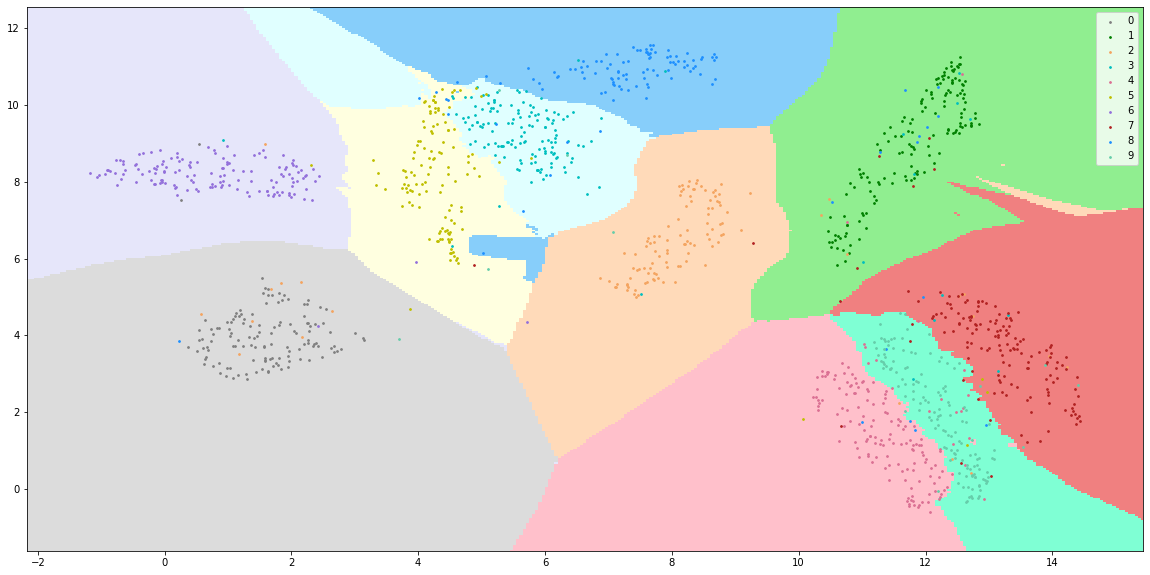

In [16]:
model = grid.best_estimator_
model.fit(X_train_projection, y_train)
plot_decision_boundaries(model, X_test_projection, y_test)

In [18]:
x_test_predict = model.predict(X_test_projection)

print("Test Accuracy =",accuracy_score(y_test, x_test_predict))

print("Confusion Matrix:\n",confusion_matrix(y_test, x_test_predict))

Test Accuracy = 0.905
Confusion Matrix:
 [[127   0   0   0   0   0   2   0   0   0]
 [  0 148   0   0   0   0   0   0   0   0]
 [  8   3 101   0   1   0   1   5   0   2]
 [  0   6   1 132   0   6   1   4   3   1]
 [  0   2   0   0 136   0   0   1   0  17]
 [  1   0   0   6   1 116   1   2   0   1]
 [  1   0   1   0   0   1 142   0   0   0]
 [  0   6   1   0   1   1   0 135   0   8]
 [  1   8   0   7   3   3   0   1  95   2]
 [  1   0   1   2   3   1   0   4   0 135]]


As we can see, the KNN algorithm with an optimal *n_neighbors* selection, performs better than Gaussian-Naive Bayes model. The accuracy of the model exceeds 90%, so we can conclude that the model classifies quite well. 


### 1.3. SVM (Support-vector machines)

The parameters we should transform into variables for Grid Search function are *C* and *Gamma*. Let's find out which combination of parameters became the best model. 

     C  gamma     Mean      Std
  0.01  0.001 0.124643 0.004974
  0.01  0.010 0.591607 0.005132
  0.01  0.100 0.858036 0.005051
  0.01  1.000 0.919107 0.010768
  0.01 10.000 0.110000 0.000357
  0.10  0.001 0.589643 0.004323
  0.10  0.010 0.896429 0.007513
  0.10  0.100 0.920357 0.009901
  0.10  1.000 0.928393 0.009165
  0.10 10.000 0.931250 0.009193
  1.00  0.001 0.890714 0.008500
  1.00  0.010 0.917679 0.009199
  1.00  0.100 0.927143 0.009116
  1.00  1.000 0.932321 0.009007
  1.00 10.000 0.933393 0.009081
 10.00  0.001 0.913929 0.008631
 10.00  0.010 0.922321 0.011545
 10.00  0.100 0.930536 0.009199
 10.00  1.000 0.933750 0.010735
 10.00 10.000 0.929643 0.008364
 50.00  0.001 0.920357 0.011468
 50.00  0.010 0.923750 0.010783
 50.00  0.100 0.931607 0.009807
 50.00  1.000 0.934107 0.010326
 50.00 10.000 0.917143 0.010631
100.00  0.001 0.921250 0.010912
100.00  0.010 0.925000 0.009878
100.00  0.100 0.931071 0.010139
100.00  1.000 0.934286 0.010797
100.00 10.000 0.911429 0.010108
200.00  

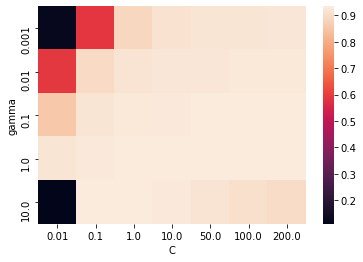

In [20]:
parameters = {'C': [0.01, 0.1, 1, 10, 50, 100, 200], "gamma": [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), parameters)
grid.fit(X_train_projection, y_train)
result = pd.DataFrame(grid.cv_results_["params"])
result["Mean"] = grid.cv_results_["mean_test_score"]
result["Std"] = grid.cv_results_["std_test_score"] 

print(result.to_string(index=False))

print("Best performance when", grid.best_estimator_) # C = 100, gamma = 1.

ax = sns.heatmap(result.pivot("gamma", "C", "Mean"))

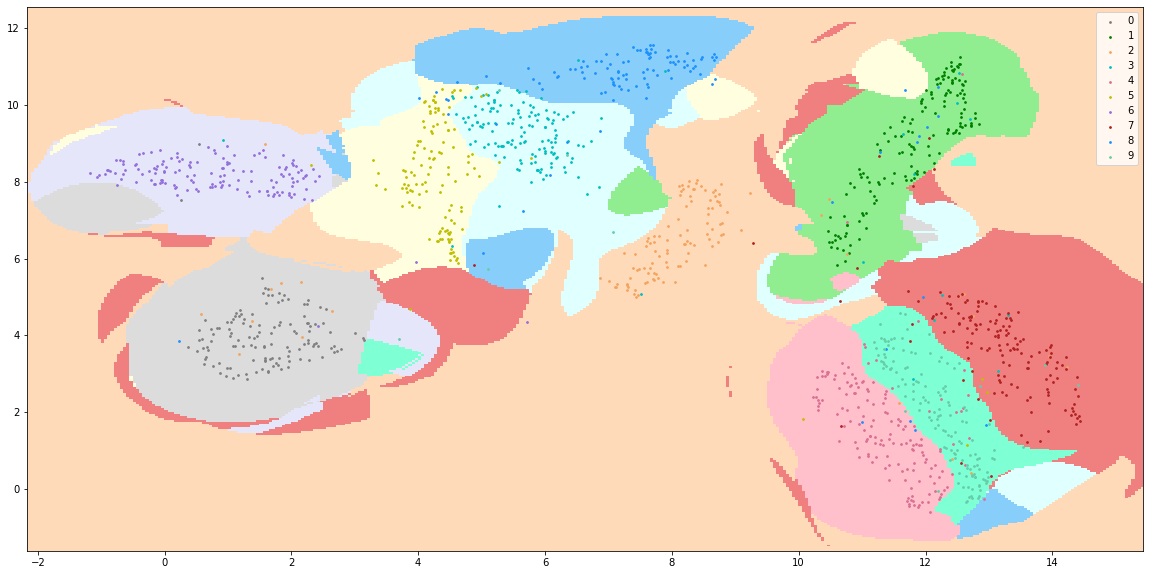

In [21]:
model = grid.best_estimator_
model.fit(X_train_projection, y_train)
plot_decision_boundaries(model, X_test_projection, y_test)

In [23]:
x_test_predict = model.predict(X_test_projection)

print("Test Accuracy =",accuracy_score(y_test, x_test_predict))

print("Confusion Matrix:\n",confusion_matrix(y_test, x_test_predict))

Test Accuracy = 0.905
Confusion Matrix:
 [[127   0   0   0   0   0   2   0   0   0]
 [  0 147   0   0   0   1   0   0   0   0]
 [  8   3 101   0   1   0   1   5   0   2]
 [  0   6   1 132   0   4   1   4   5   1]
 [  0   2   0   0 136   0   0   0   1  17]
 [  0   0   0   5   1 117   1   3   0   1]
 [  2   0   1   0   0   1 141   0   0   0]
 [  0   3   2   1   1   0   0 136   1   8]
 [  1   7   0   6   3   7   0   1  93   2]
 [  0   0   0   3   2   0   1   3   1 137]]


In this case, once more the accuracy exceeds 90%, so we have a good model performance, better than Gaussian Naive Bayes model and equal to KNN. 

### 1.4. Decision Trees

This classification model tends to overfit. 

To avoid overfitting, we will use as hyperparameters for *GridSearchCV* function the maximum depth of the trees and the minimum samples for split. 

 max_depth  min_samples_split  Promedio  Desviación estándar
         4                  2  0.841964             0.032296
         4                 10  0.841964             0.032296
         4                 20  0.841964             0.032296
         4                 50  0.841964             0.032296
         4                100  0.841964             0.032296
         5                  2  0.895893             0.005225
         5                 10  0.895536             0.004987
         5                 20  0.895536             0.004987
         5                 50  0.894464             0.006013
         5                100  0.894464             0.006013
         6                  2  0.920179             0.008444
         6                 10  0.919464             0.008440
         6                 20  0.919286             0.008704
         6                 50  0.918750             0.010443
         6                100  0.917500             0.010360
         7              

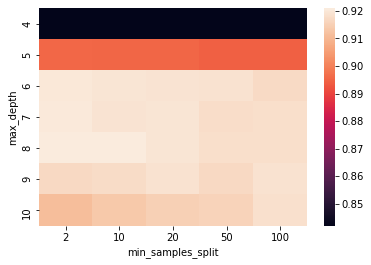

In [24]:
parameters = {'max_depth': list(range(4,11)), "min_samples_split": [2, 10, 20, 50, 100]}
grid = GridSearchCV(DecisionTreeClassifier(), parameters)
grid.fit(X_train_projection, y_train)
result = pd.DataFrame(grid.cv_results_["params"])
result["Mean"] = grid.cv_results_["mean_test_score"]
result["Std"] = grid.cv_results_["std_test_score"]                

print(result.to_string(index=False))

print("Best performance when", grid.best_estimator_) # max_depth = 8, min_samples_split = 2 (default)

ax = sns.heatmap(result.pivot("max_depth", "min_samples_split", "Mean"))

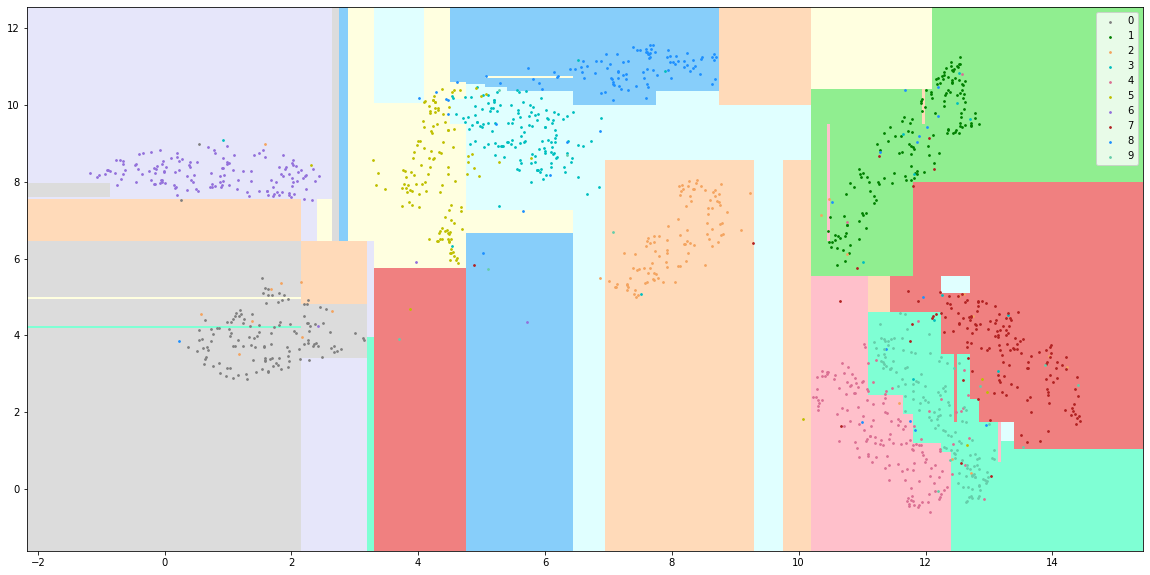

In [26]:
model = grid.best_estimator_
model.fit(X_train_projection, y_train)
plot_decision_boundaries(model, X_test_projection, y_test)

In [29]:
x_test_predict = model.predict(X_test_projection)

print("Test Accuracy =", round(accuracy_score(y_test, x_test_predict),3))

print("Confusion Matrix:\n",confusion_matrix(y_test, x_test_predict))

Test Accuracy = 0.892
Confusion Matrix:
 [[124   0   2   0   0   0   2   0   0   1]
 [  0 147   1   0   0   0   0   0   0   0]
 [  8   2 100   1   2   0   1   5   0   2]
 [  0   6   1 133   0   4   1   3   4   2]
 [  1   2   1   0 131   0   0   0   0  21]
 [  0   0   1  12   0 110   1   3   0   1]
 [  1   0   0   0   0   1 142   0   1   0]
 [  0   4   1   2   2   0   0 132   1  10]
 [  1   8   0   5   2   6   0   1  94   3]
 [  0   0   1   2   2   0   0   5   1 136]]


We got almost 90% accuracy in test set, which is quite good. Now, we can conlude that for our objective the best models, for now, are the KNN and SVC algorithms, followed by the Decision Tree model and the Gaussian-Naive Bayes algorithm. Anyway, each one of them have a nice classification performance over the MNIST Dataset. 

### 1.5. Improving Decision Trees

Normally, we don't use a simple Decision Tree for classification objectives but a combination of them. 

There are two main techniques with decision trees: *__Bagging__* and *__Boosting__*.

#### 1.5.1 Bagging

 max_depth  n_estimators  Promedio  Desviación estándar
         8            50  0.926607             0.008073
         8           100  0.924821             0.008478
         8           200  0.926786             0.008006
         9            50  0.928929             0.009692
         9           100  0.927857             0.008478
         9           200  0.929464             0.008545
        10            50  0.930893             0.008538
        10           100  0.929464             0.008470
        10           200  0.930536             0.009199
        11            50  0.929107             0.007156
        11           100  0.930714             0.008575
        11           200  0.930357             0.009432
        12            50  0.931071             0.008288
        12           100  0.931250             0.008395
        12           200  0.929821             0.008975
El mejor resultado se da cuando RandomForestClassifier(max_depth=12)


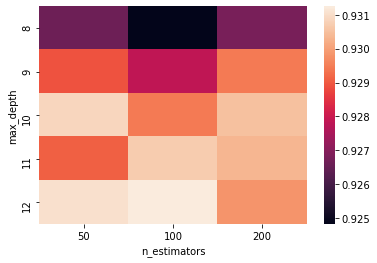

In [30]:
parameters = {'max_depth': list(range(8,13)), "n_estimators": [50, 100, 200]}
grid = GridSearchCV(RandomForestClassifier(), parameters)
grid.fit(X_train_projection, y_train)
result = pd.DataFrame(grid.cv_results_["params"])
result["Mean"] = grid.cv_results_["mean_test_score"]
result["Std"] = grid.cv_results_["std_test_score"]                

print(result.to_string(index=False))

print("Best performance when", grid.best_estimator_)

ax = sns.heatmap(result.pivot("max_depth", "n_estimators", "Mean"))

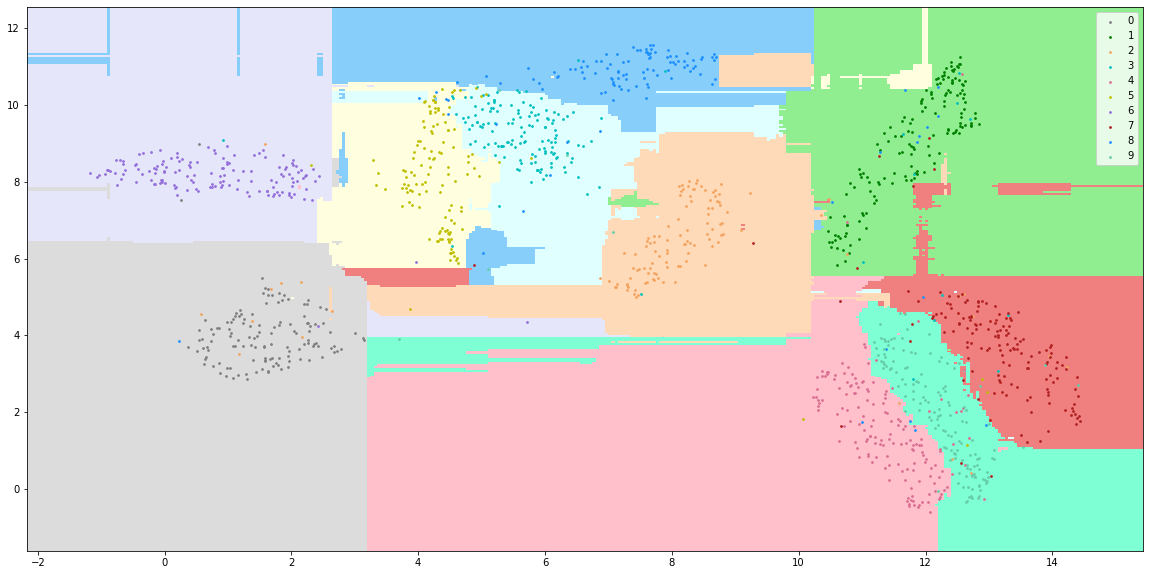

In [33]:
model = grid.best_estimator_
model.fit(X_train_projection, y_train)
plot_decision_boundaries(model, X_test_projection, y_test)

In [32]:
x_test_predict = model.predict(X_test_projection)

print("Test Accuracy =", round(accuracy_score(y_test, x_test_predict),3))

print("Confusion Matrix:\n",confusion_matrix(y_test, x_test_predict))

Test Accuracy = 0.912
Confusion Matrix:
 [[127   0   0   0   0   0   2   0   0   0]
 [  0 148   0   0   0   0   0   0   0   0]
 [  7   2 102   1   1   0   1   5   0   2]
 [  0   6   1 133   0   4   1   4   4   1]
 [  0   2   0   0 137   0   0   1   0  16]
 [  0   0   1   5   1 116   1   2   1   1]
 [  1   0   0   0   0   1 143   0   0   0]
 [  0   5   1   0   1   0   0 138   1   6]
 [  1   8   0   6   2   4   0   1  95   3]
 [  0   0   1   2   2   0   0   3   1 138]]


We obtained an accuracy that exceeds 91%. Therefore, we can conclude that the Random Forest algorithm is the best algorithm (between algorithms we have already used) for this dataset.     

#### 1.5.1 Boosting

 max_depth  n_estimators     Mean      Std
         8            20 0.915000 0.006856
         8            50 0.914821 0.009610
         8           100 0.913929 0.007610
         9            20 0.909286 0.007998
         9            50 0.913214 0.007853
         9           100 0.915000 0.005457
        10            20 0.904464 0.008911
        10            50 0.908214 0.007853
        10           100 0.913571 0.005339
        11            20 0.898571 0.008214
        11            50 0.906429 0.007606
        11           100 0.909821 0.006682
        12            20 0.896786 0.006837
        12            50 0.906964 0.008364
        12           100 0.908750 0.004601
Best performance when GradientBoostingClassifier(max_depth=8, n_estimators=20)


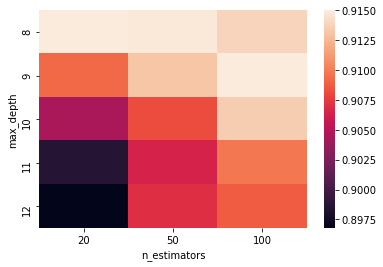

In [35]:
parameters = {'max_depth': list(range(8,13)), "n_estimators": [20, 50, 100]}
grid = GridSearchCV(GradientBoostingClassifier(), parameters)
grid.fit(X_train_projection, y_train)
result = pd.DataFrame(grid.cv_results_["params"])
result["Mean"] = grid.cv_results_["mean_test_score"]
result["Std"] = grid.cv_results_["std_test_score"]                

print(result.to_string(index=False))

print("Best performance when", grid.best_estimator_)

ax = sns.heatmap(result.pivot("max_depth", "n_estimators", "Mean"))

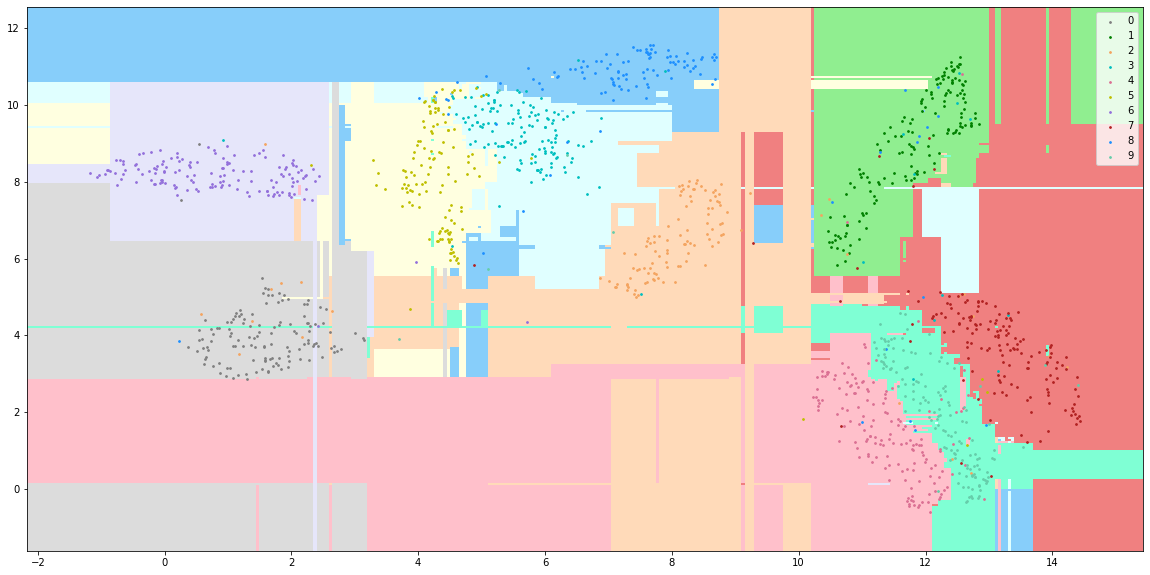

In [38]:
model = grid.best_estimator_
model.fit(X_train_projection, y_train)
plot_decision_boundaries(model, X_test_projection, y_test)

In [39]:
x_test_predict = model.predict(X_test_projection)

print("Test Accuracy =", round(accuracy_score(y_test, x_test_predict),3))

print("Confusion Matrix:\n",confusion_matrix(y_test, x_test_predict))

Test Accuracy = 0.898
Confusion Matrix:
 [[122   0   1   0   2   0   3   0   0   1]
 [  1 146   0   0   0   0   0   1   0   0]
 [  7   3 102   0   1   0   1   5   0   2]
 [  0   6   1 131   0   5   1   4   5   1]
 [  0   2   0   0 141   0   0   1   0  12]
 [  0   0   0   6   1 115   1   2   0   3]
 [  1   0   1   0   0   2 140   0   0   1]
 [  0   5   2   0   2   0   0 134   1   8]
 [  1   8   0   6   2   6   0   1  93   3]
 [  0   0   2   1   4   0   0   5   2 133]]


Finally, we can see that Gradient Boosting performs quite better than the simple Decision Tree algorithm, as we expected. Although this fact, the difference in accuracy is very small.

If we would want to investigate a little more, we can consider using *__Stacking__* and *__Cascading__* methods for trying to improve model performance.